# Imports

In [1]:

from sklearn import preprocessing

from models.neural_net import NeuralNet
from view.visualizer import *



# Dataset creation

In [2]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [100]  # Number of neurons in each layer

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)



# Neural Network training with Adam

In [3]:
from utils.preprocessing import find_center_and_magnitude

model_base_adam = NeuralNet()
model_base_adam.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=100)
y_base_train = model_base_adam.predict(dataset.X_train)
y_base_test = model_base_adam.predict(dataset.X_test)

mean, magnitude = find_center_and_magnitude(model_base_adam.weights[0], model_base_adam.biases[0])
print("Mean of the solution X.w[0]-b[0] = 0", mean)
print("Mean of the magnitude of w[0]", magnitude)


Mean of the solution X.w[0]-b[0] = 0 0.005690489
Mean of the magnitude of w[0] 1.3794097


# Sampled Netwrok training.
### very first algorithm


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 6393.85it/s]

train: loss(y_base_model, y_sampled)
r2: 0.40792583921639153	mse: 5.223790227214378
test: loss(y_base_model, y_sampled)
r2: 0.39646865236113327	mse: 6.02311317901306
are given weight matrices equal:  False
[ 0.31981931 10.26035499  0.76639826  0.24046805  0.37266236  0.40348959
  0.8231282   0.96063761  0.3503186   0.47619593  0.34566625  0.41951316
  0.99426343  0.31427973  2.44982472  0.65455057  0.69451648  0.25745762
  0.73391865  0.4181765   4.04128657  3.25818308  0.27416557  2.75224072
  3.050016    1.15203452  0.44900056  0.32675732  4.44516785  0.38826958
  1.16979905  2.42823994  0.66426494  0.45015216  2.97418474  1.25526755
  1.68924792  0.41664956  0.32208238  0.90590277  0.87807036  0.58837704
  1.59882662  0.54289171  0.31946403  0.46111498 12.19107351  0.86669672
  0.9016108   0.24784298  0.42786304  3.10363972  0.38815918  0.2723976
  3.08645826  3.06673247  0.27021482  0.29876536  0.61490426  0.37712373
  0.52351572  0.25858599  0.49819271  0.30848488  0.47040233  0.7

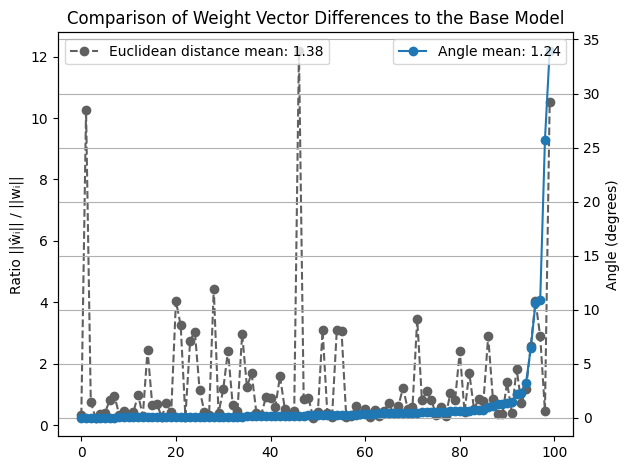

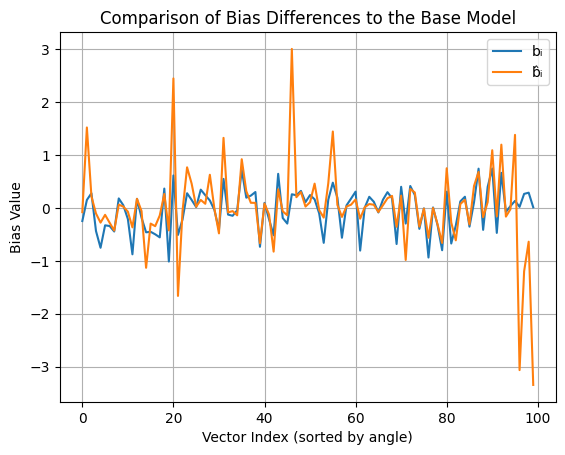

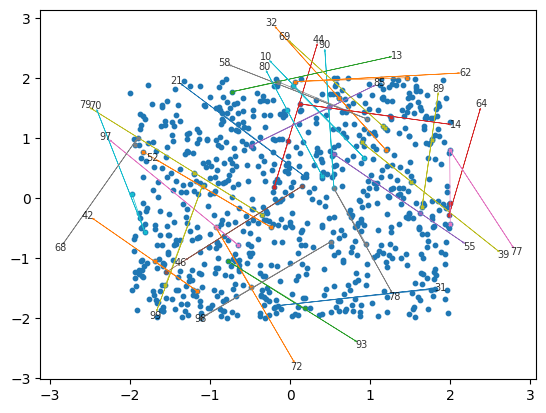

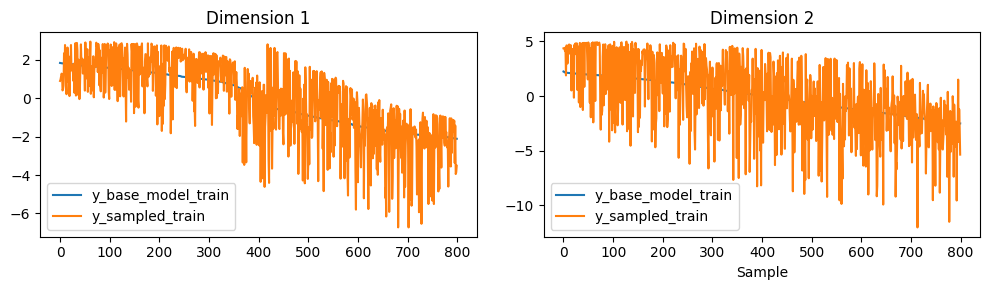

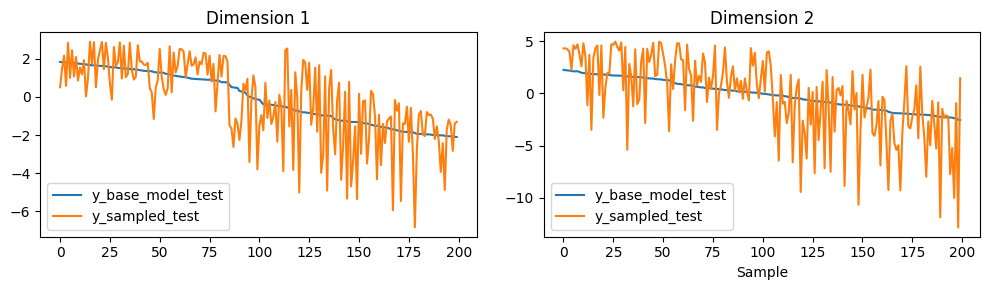

In [4]:
model_sampled = SampledNet()
x_1_x2_tuples = model_sampled.fit(dataset.X_train, y_base_train, model_base_adam, layer2="classic", choose_x_2="angle")

model_base_vs_model_sampled(dataset, model_base_adam, model_sampled, x_1_x2_tuples)

### add radius: an interval for the distance to the bias origin, and choose x_2, so that \hat{w_i} is the closest to w_i, by Euclidean distance between the two tips

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 112.86it/s]


train: loss(y_base_model, y_sampled)
r2: 0.9736089169095818	mse: 0.04584275785764544
test: loss(y_base_model, y_sampled)
r2: 0.9673885693001475	mse: 0.053772094561865456
are given weight matrices equal:  False
[1.00277718 1.00399015 1.0101586  1.00695839 0.99769762 1.00095221
 0.99222253 1.00076201 0.99860519 1.00066455 1.00596066 1.00625601
 1.02119869 0.9857589  0.99417077 0.99426343 0.99987967 0.99666941
 1.00848278 1.00963067 1.00237066 1.01353727 1.00462818 1.00432816
 0.99280726 0.99067267 0.99756498 1.00444711 1.00593522 1.00558576
 1.01052404 0.98800864 1.0038003  1.010325   1.003051   1.00236878
 0.98665919 0.99242067 1.00138428 0.99682775 0.99222549 1.00044133
 1.00576672 1.00157072 0.99395256 0.99050131 0.9938167  0.99861301
 0.97259526 0.99303995 0.99313657 0.99829308 1.02143799 1.00052241
 1.00175701 0.99955166 0.99011663 1.0032854  0.99922642 0.99606351
 0.99766768 1.00532647 0.99559303 0.99957563 1.00616149 0.98818074
 1.00419205 0.99647309 0.98913023 1.0018303  0.987569

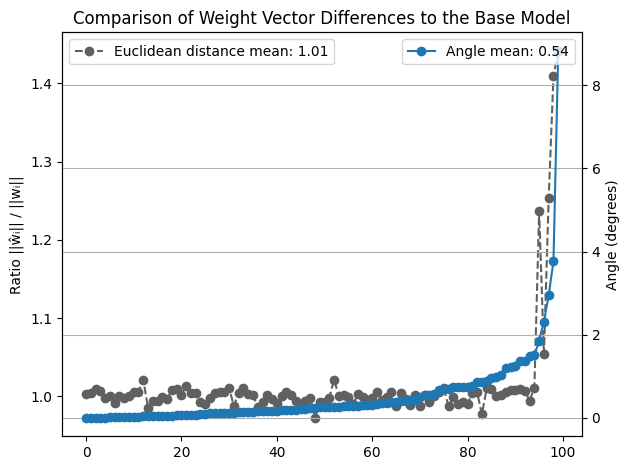

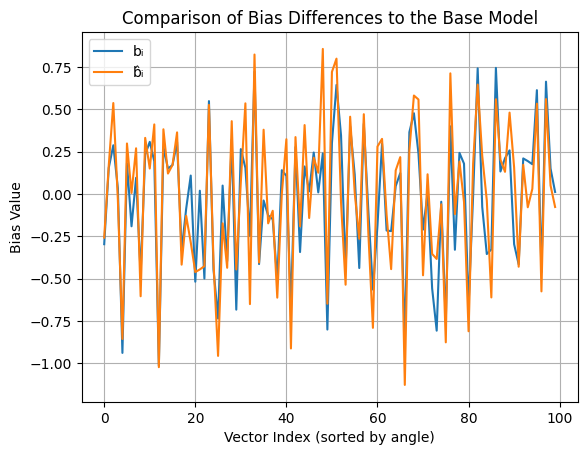

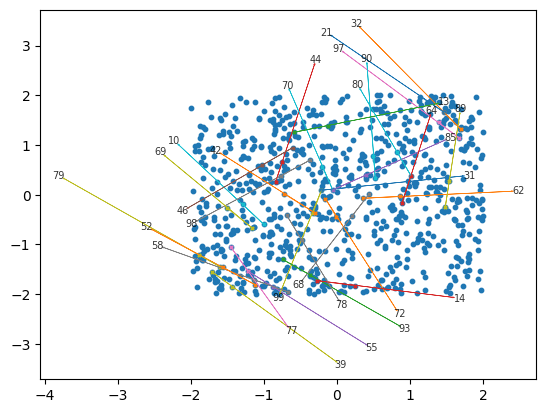

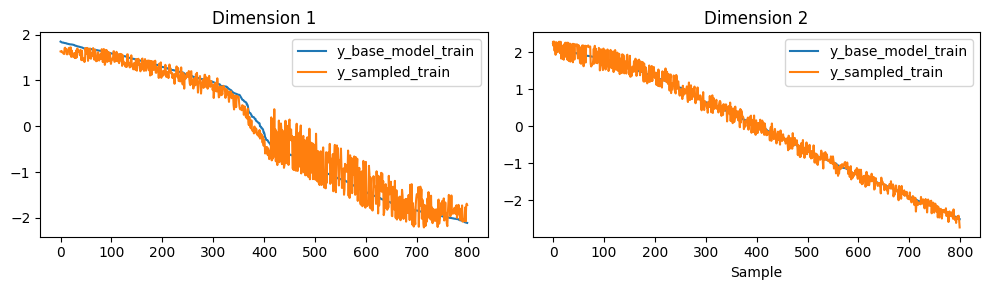

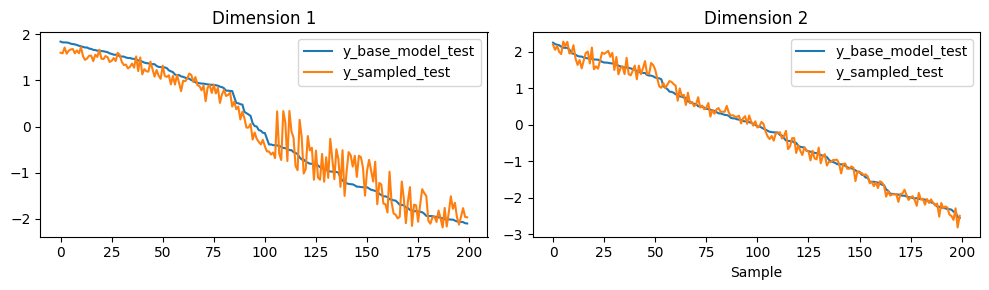

In [5]:
model_sampled = SampledNet()
x_1_x2_tuples = model_sampled.fit(dataset.X_train, y_base_train, model_base_adam, layer2="classic", radius=0.09,
                                  choose_x_2="norm")
model_base_vs_model_sampled(dataset, model_base_adam, model_sampled, x_1_x2_tuples)


### additionally shift x_1 and x_2 so that x_1 lies on the original bias origin

Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 97.29it/s]


train: loss(y_base_model, y_sampled)
r2: 0.9962321019707847	mse: 0.007085678303230833
test: loss(y_base_model, y_sampled)
r2: 0.995058399353199	mse: 0.008896423060093857
are given weight matrices equal:  False
[1.00277718 1.00399015 1.0101586  1.00695839 0.99769762 1.00095221
 0.99222253 1.00076201 0.99860519 1.00066455 1.00596066 1.00625601
 1.02119869 0.9857589  0.99417077 0.99426343 0.99987967 0.99666941
 1.00848278 1.00963067 1.00237066 1.01353727 1.00462818 1.00432816
 0.99280726 0.99067267 0.99756498 1.00444711 1.00593522 1.00558576
 1.01052404 0.98800864 1.0038003  1.010325   1.003051   1.00236878
 0.98665919 0.99242067 1.00138428 0.99682775 0.99222549 1.00044133
 1.00576672 1.00157072 0.99395256 0.99050131 0.9938167  0.99861301
 0.97259526 0.99303995 0.99313657 0.99829308 1.02143799 1.00052241
 1.00175701 0.99955166 0.99011663 1.0032854  0.99922642 0.99606351
 0.99766768 1.00532647 0.99559303 0.99957563 1.00616149 0.98818074
 1.00419205 0.99647309 0.98913023 1.0018303  0.987569

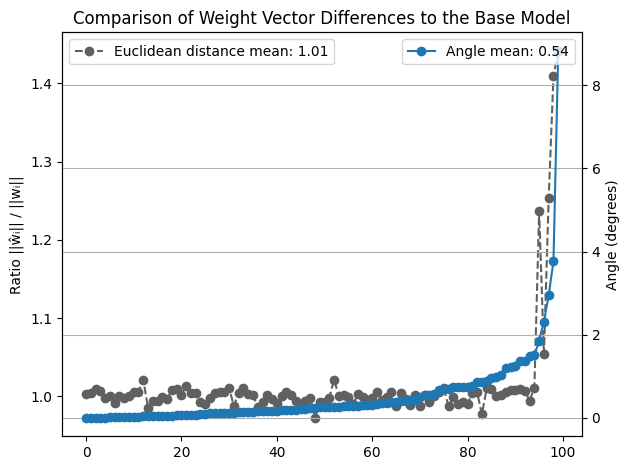

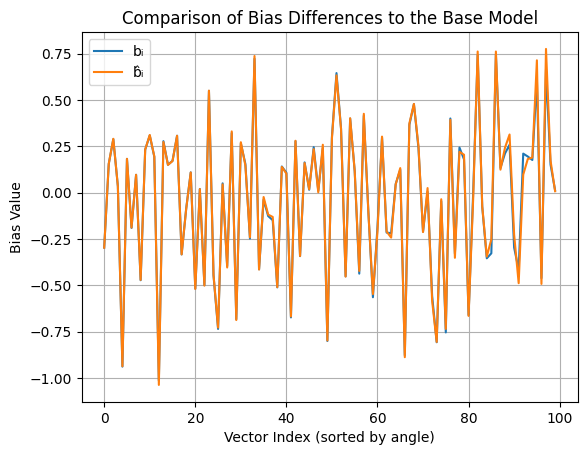

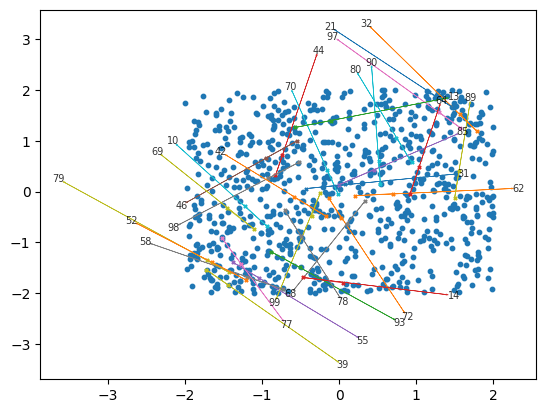

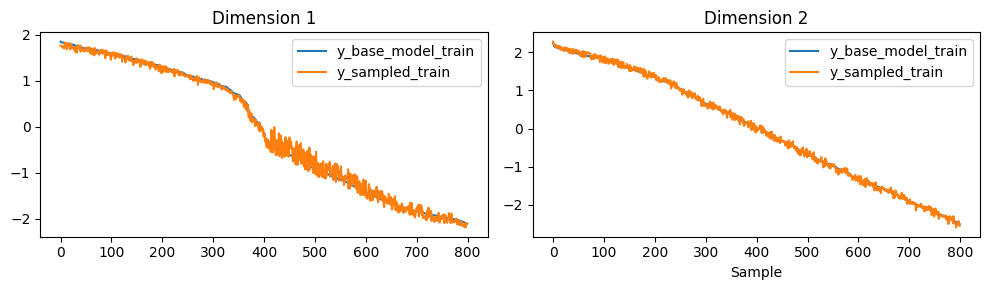

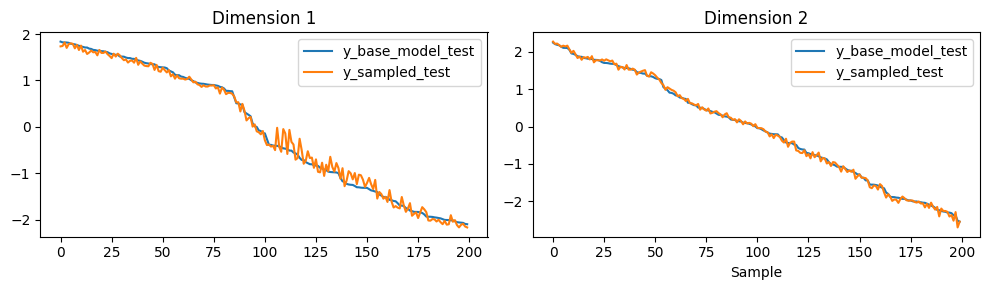

In [6]:
model_sampled = SampledNet()
x_1_x2_tuples = model_sampled.fit(dataset.X_train, y_base_train, model_base_adam, layer2="classic", radius=0.09,
                                  choose_x_2="norm", project_onto_boundary=True)

model_base_vs_model_sampled(dataset, model_base_adam, model_sampled, x_1_x2_tuples)


### use ridge regression for layer 2

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 185.22it/s]


alpha 	loss validation
0.0001 	1.595e-04
0.001 	1.584e-04
0.01 	1.695e-04
0.1 	2.738e-04
1 	8.364e-04
10 	4.089e-03
100 	6.017e-02
train: loss(y_base_model, y_sampled)
r2: 0.9999267339662496	mse: 0.0001434906350037434
test: loss(y_base_model, y_sampled)
r2: 0.99987898986586	mse: 0.00022830244478871535
are given weight matrices equal:  False
[1.00277718 1.00399015 1.00695839 0.99769762 1.00842706 0.99860519
 1.00066455 1.00596066 1.02119869 0.9857589  0.99417077 1.0110767
 0.99426343 0.99987967 0.99666941 1.00848278 1.00237066 1.00462818
 1.00432816 0.99280726 1.01756828 0.9942183  1.01813858 1.00444711
 1.00593522 1.01052404 1.010325   1.003051   0.98665919 0.99242067
 0.99682775 0.99289978 1.00576672 0.9938167  0.99861301 1.00119065
 1.01429854 0.99303995 0.99829308 1.00052241 1.00175701 0.99955166
 0.99011663 0.98806699 1.03327853 1.0032854  1.00430898 0.99922642
 1.01240353 0.99920225 1.00532647 0.99559303 0.99957563 0.99763213
 0.98818074 0.99821442 0.99647309 0.98913023 1.00216496

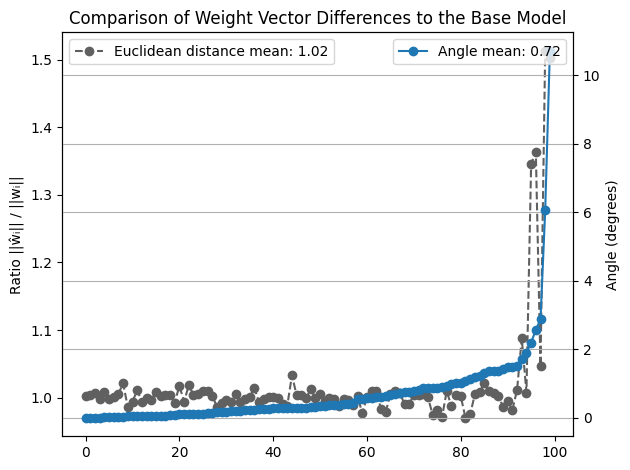

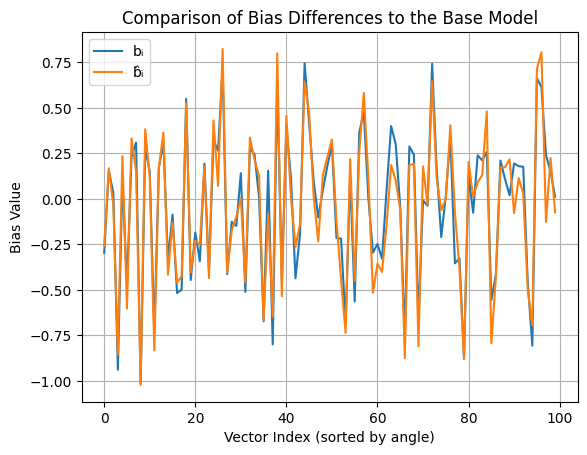

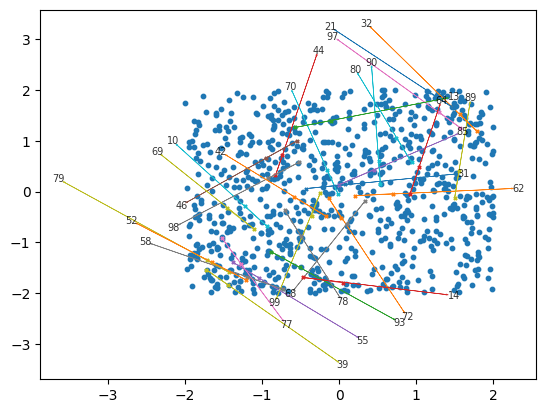

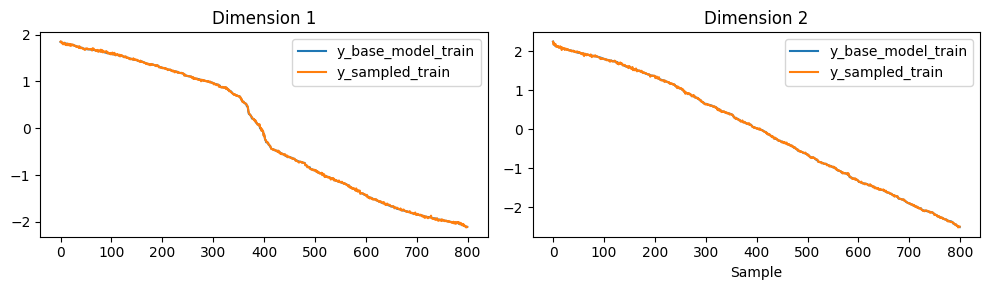

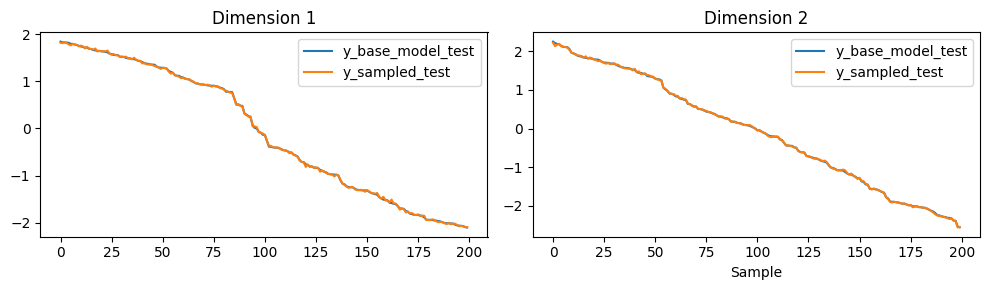

In [7]:
model_sampled = SampledNet()
model_sampled.fit(dataset.X_train, y_base_train, model_base_adam, layer2="ridge", radius=0.05,
                  choose_x_2="norm")

model_base_vs_model_sampled(dataset, model_base_adam, model_sampled, x_1_x2_tuples)


### Calculate radius vs loss.

In [8]:

y_base_train = model_base_adam.predict(dataset.X_train)
y_base_test = model_base_adam.predict(dataset.X_test)
weight1 = []
weight2 = []
losses = []
biases = []
radii = np.linspace(0, 0.5, 10)
for radius in radii:
    print(f"Radius {radius}")

    model_sampled = SampledNet()
    model_sampled.fit(
        dataset.X_train, y_base_train, model_base_adam, layer2="classic", radius=radius, verbose=0
    )
    weight1.append(model_sampled.weights[0])
    weight2.append(model_base_adam.weights[0])
    biases.append(model_sampled.biases[0])
    y_sampled_test = model_sampled.predict(dataset.X_test)
    loss_sampled_to_base = loss_mse(y_sampled_test, y_base_test)
    losses.append(loss_sampled_to_base)
    print(f"loss{loss_sampled_to_base}\n")


Radius 0.0


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 4860.65it/s]


loss0.11981406039747286

Radius 0.05555555555555555


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 170.44it/s]


loss0.02091218469216688

Radius 0.1111111111111111


Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 82.07it/s]


loss0.04387208294618322

Radius 0.16666666666666666


Layer1 sampling: 100%|██████████| 100/100 [00:02<00:00, 42.61it/s]


loss0.10060841093133871

Radius 0.2222222222222222


Layer1 sampling: 100%|██████████| 100/100 [00:02<00:00, 44.97it/s]


loss0.24521948584791073

Radius 0.2777777777777778


Layer1 sampling: 100%|██████████| 100/100 [00:02<00:00, 35.29it/s]


loss0.787119890780296

Radius 0.3333333333333333


Layer1 sampling: 100%|██████████| 100/100 [00:03<00:00, 30.12it/s]


loss1.0625667025401118

Radius 0.38888888888888884


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 24.61it/s]


loss0.8416590082340738

Radius 0.4444444444444444


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 23.34it/s]


loss0.6189014970230928

Radius 0.5


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 20.93it/s]

loss0.8270294076627294



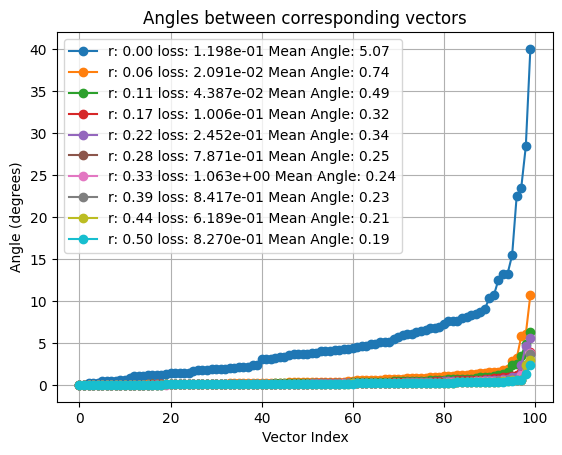

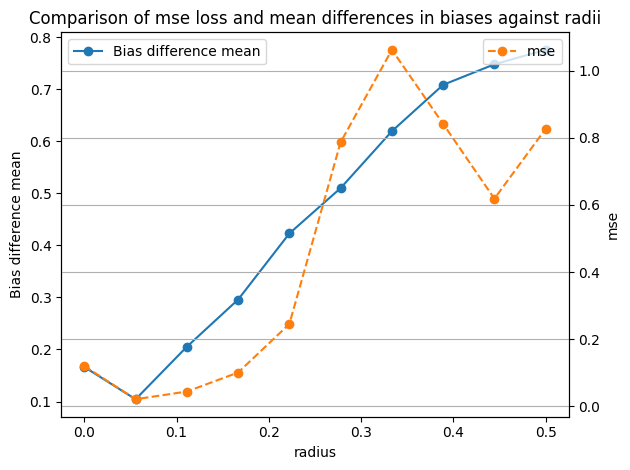

In [9]:
plot_vector_differences(weight1, weight2, model_base_adam.biases[0], biases, radii, losses)

### augment data with gaussian sampling

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 270.49it/s]


Before data augmentation
train: loss(y_base_model, y_sampled)
r2: 0.8689634224763738	mse: 0.1680220380128845
test: loss(y_base_model, y_sampled)
r2: 0.6902923149254298	mse: 0.17673212175549438
are given weight matrices equal:  False
[0.94730958 0.72587376 1.1771172  1.04292632 0.79430157 0.95819208
 0.7816713  0.82469665 1.32466223 1.14912899 0.81561111 0.63299171
 0.9874284  0.84701495 0.78065503 0.68030026 0.68565649 0.9647361
 0.64893081 0.68647487 1.22684705 0.49794962 0.80541821 1.02674818
 0.95614044 0.38685696 0.99589572 0.91182419 0.64544092 0.58705299
 1.08612422 1.09430088 0.98879833 0.95289488 0.89631184 0.92391006
 0.99734213 0.71247553 0.70221405 1.34412018 0.81100291 0.87387706
 0.81147219 0.66023496 0.66653331 1.0384175  0.88756943 1.03978815
 0.6801643  1.36246322 0.9587473  0.97978476 0.8430318  0.79828992
 0.96123749 0.94184756 0.56442064 0.85555791 1.21109049 1.13820333
 1.49035693 1.31653548 0.57645997 0.80454707 0.95946792 0.93579392
 0.56565455 0.49134308 0.779984

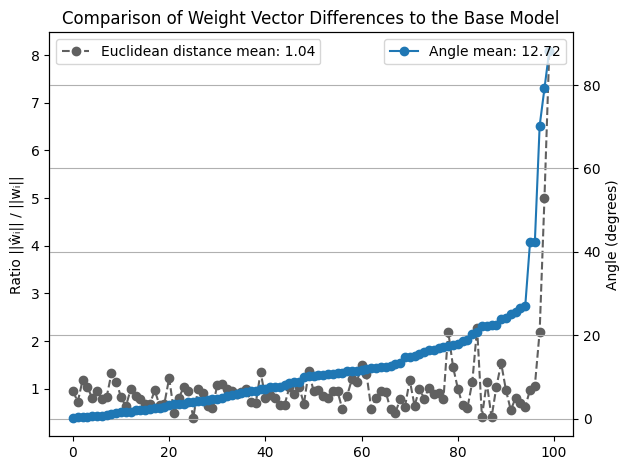

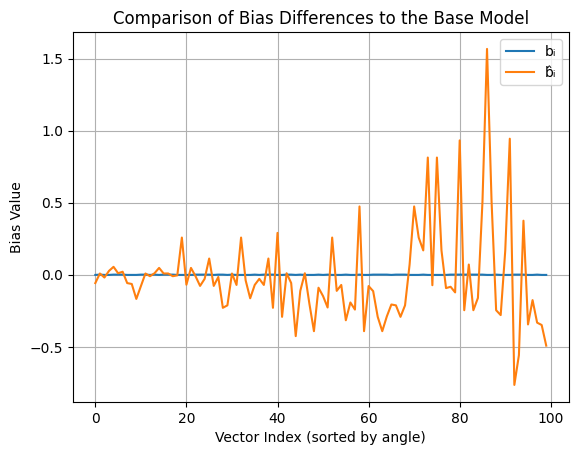

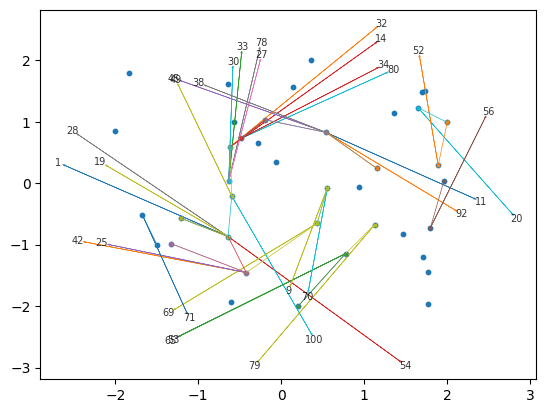

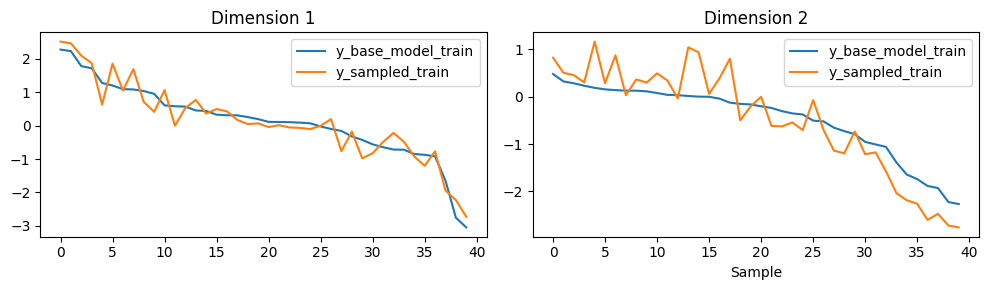

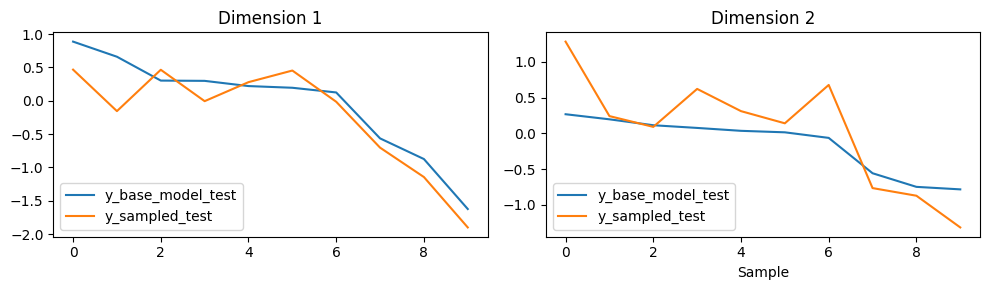

After data augmentation
train: loss(y_base_model, y_sampled)
r2: 0.9880067686720955	mse: 0.01261954337746398
test: loss(y_base_model, y_sampled)
r2: 0.9508101839780937	mse: 0.018311112845830948
are given weight matrices equal:  False
[0.98817696 0.97555468 1.00481712 1.00371903 1.01393073 1.02082974
 1.01293455 0.99317874 1.0046547  0.98172023 0.97669459 0.95892557
 1.00086548 0.97051093 1.03185211 1.00327485 1.00093528 0.99125322
 1.00946926 1.01049958 1.02280761 0.99637419 1.00807153 1.00561725
 0.99938258 1.02419303 0.99576579 1.01136674 1.00768577 0.95947431
 0.97302455 0.9962746  1.0239404  1.00131255 1.00814924 1.02802132
 1.00394196 0.99501521 0.99658021 0.99937877 0.9848822  0.99657744
 1.00949402 1.01339846 0.97547694 1.01125092 1.01958406 0.98894008
 0.99526443 0.9845371  0.99368812 1.00439963 1.00633425 0.98372426
 0.98392677 1.00015077 0.99474426 1.0490242  0.98663217 1.00921622
 0.99490603 0.98113544 1.00853963 0.99574057 0.99891157 0.98840283
 1.00304078 1.0005918  1.0184

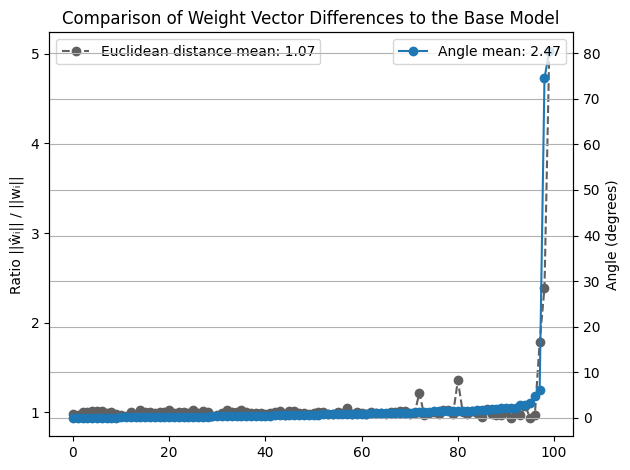

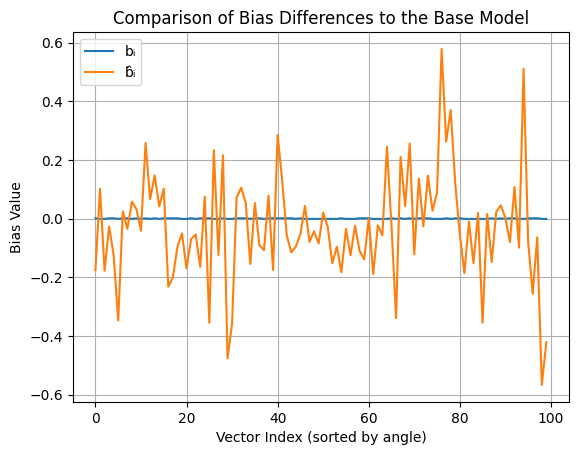

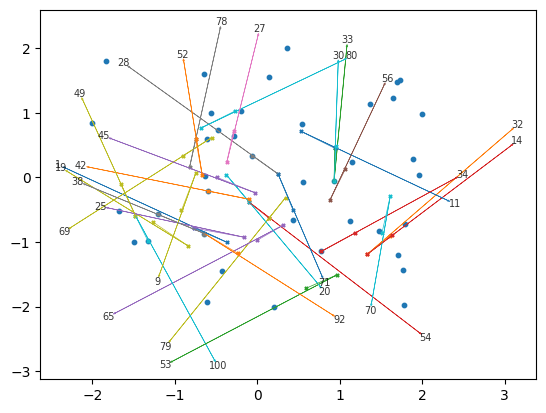

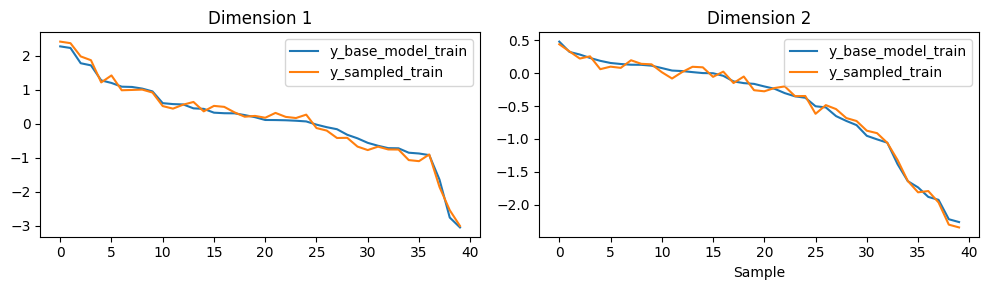

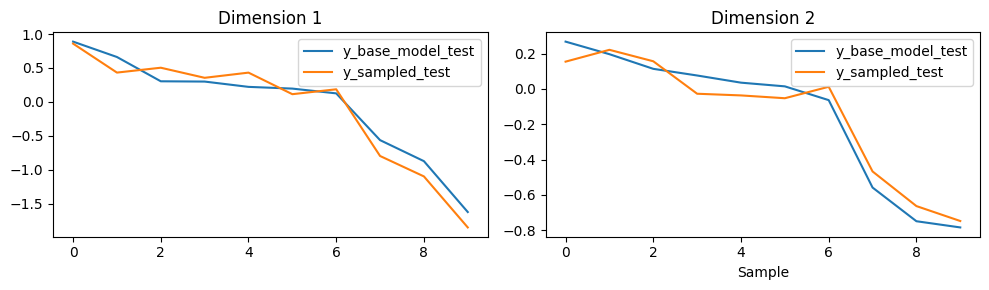

In [10]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 50  # Number of data points
epochs = 100  # Number of training epochs
l = [100]  # Number of neurons in each layer

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)

model_base_adam = NeuralNet()
model_base_adam.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=1)
y_base_train = model_base_adam.predict(dataset.X_train)
y_base_test = model_base_adam.predict(dataset.X_test)

model_sampled = SampledNet()
x_1_x2_tuples = model_sampled.fit(dataset.X_train, y_base_train, model_base_adam, layer2="classic", radius=0.05,
                                  choose_x_2="norm")

model_sampled_input_augmented = SampledNet()
x_1_X2_tuples_input_augmented = model_sampled_input_augmented.fit(dataset.X_train, y_base_train, model_base_adam,
                                                                  layer2="classic",
                                                                  radius=0.05,
                                                                  choose_x_2="norm", augment_data=(1, 10))

print("Before data augmentation")
model_base_vs_model_sampled(dataset, model_base_adam, model_sampled, x_1_x2_tuples)
print("After data augmentation")
model_base_vs_model_sampled(dataset, model_base_adam, model_sampled_input_augmented, x_1_X2_tuples_input_augmented)
